# Import Required Libraries
Import the necessary libraries, including TensorFlow and Keras.

In [14]:
# Import Required Libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST Dataset
Load the MNIST dataset using Keras datasets module.

In [15]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255

# One-hot encode target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
# Verify data shapes
print('x_train shape:', x_train.shape)  # Should be (60000, 784)
print('y_train shape:', y_train.shape)  # Should be (60000, 10)

x_train shape: (60000, 784)
y_train shape: (60000, 10)


# Build the Model
Define the neural network architecture using Keras Sequential API.

In [17]:
# Build the Model
# Define the model

model = Sequential()
model.add(Dense(50, input_dim=28*28, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

/Users/jportilla/anaconda3/envs/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model
Compile the model with appropriate loss function, optimizer, and metrics.

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Display the model's architecture
model.summary()  # Print the model summary to see the architecture and parameters

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
Train the model using the training data.

In [19]:
# Train the model

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512)


Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6035 - loss: 1.3007 - val_accuracy: 0.9050 - val_loss: 0.3709
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.4608 - val_accuracy: 0.9225 - val_loss: 0.2827
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.3681 - val_accuracy: 0.9315 - val_loss: 0.2442
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9097 - loss: 0.3205 - val_accuracy: 0.9377 - val_loss: 0.2182
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9154 - loss: 0.2935 - val_accuracy: 0.9427 - val_loss: 0.2007


# Evaluate the Model
Evaluate the model using the test data and print the results.

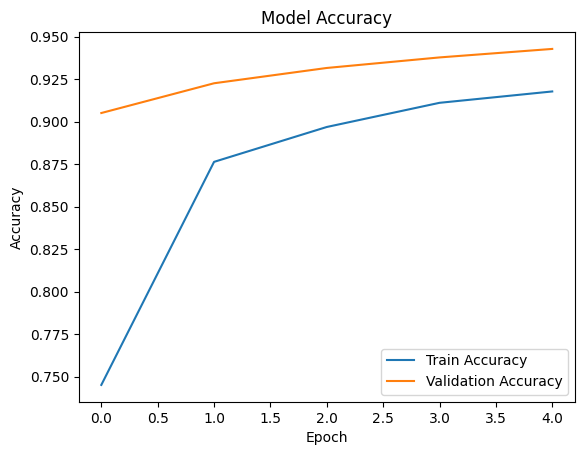

In [20]:
# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_history(history)